### Strategy Backtesting Using Python (DMP-1) Assignment Solutions

#### Date created: 22/05/2020

#### Fetching the required data and importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings

warnings.filterwarnings('ignore')


end1 = dt.date(2020, 4, 30)
start1 = dt.date(2015, 1, 2)

df = yf.download("MSFT", start=start1, end=end1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

**Q1: Try out the ‘Big Moves Monday’ strategy on the above data with standard conditions as taught in the class. Now back-test the strategy again but this this time tweak condition 3 such that 'ibs' value must be lower than 0.8. Comment on the results. (5 marks)**

In [ ]:
# Creating required functions for standard backtesting as taught in the class
def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))

    return data

def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on Mondays" trading strategy.
    """
    # Columns created to check condition 1
    data['day'] = data.index.day_name()
    data['prev_day'] = data['day'].shift(1)
    data['four_days_after'] = data['day'].shift(-4)

    # Columns created to check condition 2
    data['relative_range'] = (data['High'] - data['Low']) / data['Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window=25).mean()

    # Column created to check condition 3
    data['ibs'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])

    return data

def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)

    data['condition2'] = np.where((1 - data['Close'] / data['Close'].shift(1))
                                  >= 0.25 * data['rel_range_ma'], 1, 0)

    data['condition3'] = np.where(data['ibs'] < 0.3, 1, 0)

    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)

    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)

    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)

    data['strategy_returns'] = data['cc_returns'] * data['position']

    return data


def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
    print('Buy and hold returns: ', np.round(data['cc_returns'].cumsum()[-1], 2))
    print('Strategy returns: ', np.round(data['strategy_returns'].cumsum()[-1], 2))

    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
 

In [ ]:
# Backtesting using standard conditions
df2 = df.copy()
df2 = compute_daily_returns(df2)
df2 = compute_indicators(df2)
df2 = backtest_strategy(df2)
show_backtesting_results(df2)

In [ ]:
# Redefining the backtest_strategy function with tweaked condition 3


def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)

    data['condition2'] = np.where((1 - data['Close'] / data['Close'].shift(1))
                                  >= 0.25 * data['rel_range_ma'], 1, 0)

    # make changes here
    data['condition3'] = np.where(data['ibs'] < 0.8, 1, 0)

    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)

    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)

    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)

    data['strategy_returns'] = data['cc_returns'] * data['position']

    return data

In [ ]:
df2 = df.copy()
df2 = compute_daily_returns(df2)
df2 = compute_indicators(df2)
df2 = backtest_strategy(df2)
show_backtesting_results(df2)

In [ ]:
# The tweaked version produces better results for this stock in the given timeframe. 

**Q2: You have seen a strategy based on MACD indicator in the class. In a similar way, back-test the 20 day Bollinger band strategy on the above equity (buy when the price crosses the lower band and sell when the price touches the upper band. Exit from either position when the price crosses the 20 day MA). (5 Marks)**

In [ ]:
df1=df.copy()

In [ ]:
df1

In [ ]:
df1['20_day_sma'] = df1['Adj Close'].rolling(window = 20,center=False).mean()
df1['20_day_std'] = df1['Adj Close'].rolling(window = 20, center=False).std()
df1.dropna(inplace=True)

In [ ]:
df1['upper_band'] = df1['20_day_sma']+ 2* df1['20_day_std']
df1['lower_band'] = df1['20_day_sma']- 2* df1['20_day_std']

In [ ]:
df1['prev Adj Close'] = df1['Adj Close'].shift()
df1['prev upper_band'] = df1['upper_band'].shift()
df1['prev lower_band'] = df1['lower_band'].shift()

In [ ]:
df1['signal'] = np.where((df1['Adj Close']> df1['upper_band'])&(df1['prev Adj Close']< df1['prev upper_band']) ,-1,0)
df1['signal'] = np.where((df1['Adj Close']< df1['lower_band'])&(df1['prev Adj Close']> df1['prev lower_band']) ,1,df1['signal'])

In [ ]:
df1['signal'].value_counts()

In [ ]:
df1['position'] = df1['signal'].replace(to_replace=0,method='ffill')
df1['position'].value_counts()

In [ ]:
x = df1[['20_day_sma','upper_band','lower_band','Adj Close','position']]
x.plot(secondary_y= 'position', grid=True, figsize=(20, 8))

In [ ]:
df1['B&H_returns'] =df1['Adj Close'].pct_change()
df1['strategy_returns'] = df1['B&H_returns']*df1['position'].shift(1) 

In [ ]:
df1['B&H_cumulative'] = (1+df1['B&H_returns']).cumprod() -1
df1['strategy_cumulative'] = (1+df1['strategy_returns']).cumprod() -1

In [ ]:
df1[['B&H_cumulative','strategy_cumulative']].plot(figsize=(10,5))

In [ ]:
# B&H significantly outperforms our Bollinger band startegy over this period

**Q3: Write a customized function that computes returns for the exponential moving average (EMA) strategy (discussed in class) for different windows(spans). Find the value between 1 and 30 which produces best overall total return . (5 Marks)**

In [ ]:
# Defining the required function

def optimizing_EMA(ema):
    
    # read data into a dataframe 
    df1b = df.copy()
    
    # Prepare for vectorization
    df1b['cc_returns'] = df1b['Close'].pct_change()
    df1b['ema'] = df1b['Close'].ewm(span=ema, adjust=False).mean()
    
   
    # Vectorized backtest using numpy.where
    df1b['position'] = np.where((df1b['Close'] > df1b['ema']), 1, 0)
    df1b['position'] = df1b['position'].shift(1)
    
    # Calculating returns
    df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']
    df1b['strategy_returns'] = (1+df1b['strategy_returns']).cumprod()
    
    # output
    return float(df1b['strategy_returns'].iloc[-1]),ema

In [ ]:
# Finding optimal value for EMA
ema_values = range(1,30)
returns_vs_ema = []

for i in ema_values:
    returns_vs_ema.append(optimizing_EMA(i))

In [ ]:
returns_vs_ema

In [ ]:
max(returns_vs_ema)

**Q4: The moving average crossover (MAC) code is implemented where we always have an open position. Calculate returns where short selling is not allowed. Plot a graph comparing returns from buy-and-hold, no short selling, and the one we did in class. Comment on your results. (5 Marks)**

In [ ]:
# creating a copy
df2= df.copy()

# defining moving average window parameters
m = 50    #  the shorter lookback period
n = 200   # the longer lookback period

##calculating MAs
df2['ShortMA'] = df2['Adj Close'].rolling(window=m, center=False).mean()
df2['LongMA'] = df2['Adj Close'].rolling(window=n, center=False).mean()

df2['ShortMA2'] = df2['ShortMA'].shift(1)
df2['LongMA2'] = df2['LongMA'].shift(1)

df2.dropna(inplace=True)
print(df2.shape)
print(df2.head())
print(df2.tail())


In [ ]:
#calculating daily "buy & hold" returns 
df2['daily_returns']=np.log(df2['Adj Close']/df2['Adj Close'].shift(1))
df2['buy & hold cumulative returns']=np.cumsum(df2['daily_returns'])

In [ ]:
# long-short strategy
df2.dropna(inplace=True)
df2["short_allowed_position"]=np.where((df2['ShortMA'] > df2['LongMA']), 1, -1)

df2["short_allowed_returns"]=(df2["short_allowed_position"].shift())*df2['daily_returns']

df2['cumulative returns_short_allowed']=df2["short_allowed_returns"].cumsum()

# Visualizing the long-short strategy
a=df2[['ShortMA','LongMA','short_allowed_position']].plot()
df2[['ShortMA','LongMA','short_allowed_position']].plot(ax=a,secondary_y='short_allowed_position',figsize=(15,5))
plt.show()

In [ ]:
# Generating positions  & returns in case where short selling is NOT allowed ie "long only" case
df2['Position_long_only'] = np.where((df2['ShortMA'] > df2['LongMA']), 1, 0)

df2['returns_long_only']=df2['daily_returns']*(df2['Position_long_only'].shift(1))

df2["cumulative_returns_long_only"]=df2['returns_long_only'].cumsum()


# Visualizing the long only strategy
a=df2[['ShortMA','LongMA','Position_long_only']].plot()
df2[['ShortMA','LongMA','Position_long_only']].plot(ax=a,secondary_y='Position_long_only',figsize=(15,5))
plt.show()

In [ ]:
# plotting cumulative returns for comparison
df2[['buy & hold cumulative returns','cumulative returns_short_allowed','cumulative_returns_long_only',]].plot(figsize=(10,5))
plt.show()

**Q5: Download the data for the following companies TSLA, NFLX, AMZN, GOOG and CVX using the code for automatically downloading multiple stocks from January 1st 2015 to April 30th 2020.  You can use Yahoo Financel for downloading data. (5 Marks)<br>
For the above-mentioned time period<br>
a) Compute the daily returns (assuming you buy at open and sell at close) every day.<br>
b) Compute the hit ratio for each of them(recall that the hit ratio is the ratio of number of positive trades to total number of trades).<br>
c) Compute the cumulative returns for each of them.<br>
Plot them graphically and comment on your results.**


In [2]:
# importing the necessary library
from concurrent import futures

stocksList = ['TSLA','GOOG','AMZN','NFLX','CVS']

list_stocks = []

### Keeping track of failed ticker download queries
bad_tickers = []

end = dt.date(2020, 4, 30)
start = dt.date(2015, 1, 2)

def download_stocks(stock):
    try:
        print('Trying to retrieve the %s symbol...\n' % (stock))
        stock_df = web.DataReader(stock, 'yahoo', start, end)
        stock_df['Name'] = stock
        output_name = stock + '.csv'
        list_stocks.append(output_name)
        stock_df.to_csv(output_name)
        print('Symbol %s downloaded OK.\n' % (stock))
    except:
        bad_tickers.append(stock)
        print('Problems downloading the %s symbol.\n' % (stock))


# We use the concurrent.futures module's ThreadPoolExecutor 
# to speed up the downloads by doing them in parallel rather than serially

### Set the maximum thread number
max_workers = 50

workers = min(max_workers, len(stocksList)) 
### In case a smaller number of stocks than threads was passed in
with futures.ThreadPoolExecutor(workers) as executor:
    res = executor.map(download_stocks, stocksList)
### map allows multiple calls to the given function. It passes each of the items in stocksList (any 
### iterable) to the function. Here, it can happen concurrently because of the ThreadPoolExecutor()
### subClass

Trying to retrieve the TSLA symbol...
Trying to retrieve the GOOG symbol...
Trying to retrieve the AMZN symbol...



Trying to retrieve the NFLX symbol...

Trying to retrieve the CVS symbol...

Symbol TSLA downloaded OK.

Symbol AMZN downloaded OK.

Symbol NFLX downloaded OK.

Symbol GOOG downloaded OK.

Symbol CVS downloaded OK.



In [5]:
# A function to take in a stock symbol, reads saved data from the csv file & returns a dataframe containing returns assuming buy at open and sell at close
def returns_calculator(stock):
    stock_df = pd.read_csv(stock + '.csv',index_col='Date')
    stock_df[stock] = np.log(stock_df['Close']/stock_df['Open'])
    stock_Ret = pd.DataFrame(stock_df[stock])
    return(stock_Ret)
    

In [13]:
# create a Series
pd.Series(stocksList)

# apply the returns_calculator() to each element of the series and save the new Series in "res"
res = pd.Series(stocksList).apply(returns_calculator)

# Each value in the 'res' Series is a DataFRame of returns

In [16]:
# Creating an empty dataframe called "result"
result=pd.DataFrame()
result

# taking individual dataframes (each stock) and concatanating it to empty df result on the column axis
for i in res:
    result = pd.concat([i,result],axis=1)

result.head()

,CVS,NFLX,AMZN,GOOG,TSLA
Date,,,,,
2015-01-02,-0.014821,0.014084,-0.013074,-0.007971,-0.016102
2015-01-05,-0.004556,-0.040332,-0.015824,-0.018108,-0.021007
2015-01-06,-0.004236,-0.018023,-0.023263,-0.025647,0.005791
2015-01-07,0.010690,-0.012845,0.003088,-0.011705,-0.011313
2015-01-08,0.011291,0.013910,0.000466,0.009374,-0.010344


HitRatios
 CVS     0.495153
NFLX    0.487696
AMZN    0.498881
GOOG    0.519761
TSLA    0.507830
dtype: float64


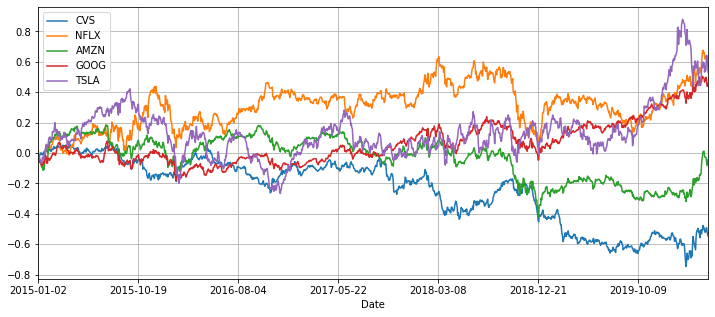

In [17]:
# Calculating required values and plotting the equity curve

HitRatio = result[result>0].count()/result.count()
print("HitRatios\n",HitRatio)

Eq_curve = result.cumsum()
Eq_curve.plot(grid=True, figsize=(12,5))
plt.show()